<a href="https://colab.research.google.com/github/Vice10/ds_notebooks/blob/main/feature_extraction_balanced.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf 
from tensorflow import keras
%matplotlib inline
!pip install yellowbrick

     |████████████████████████████████| 274 kB 4.7 MB/s 


In [ ]:
df = pd.read_csv("./ivcr.csv")
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,Female,21,Married partner,1,Some college - no degree,Student,$25000 - $37499,NaN,never,gt8,1~3,gt8,1~3,1,1,0,0,1,0
1,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,Female,31,Single,0,High School Graduate,Healthcare Support,$25000 - $37499,NaN,never,1~3,1~3,1~3,less1,1,0,0,0,1,1
2,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,50plus,Married partner,1,High School Graduate,Retired,$75000 - $87499,NaN,never,never,4~8,less1,1~3,1,1,0,0,1,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),1d,Male,31,Single,0,Bachelors degree,Office & Administrative Support,$25000 - $37499,NaN,never,less1,less1,less1,less1,1,1,0,0,1,1
4,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,50plus,Married partner,1,Bachelors degree,Retired,$87500 - $99999,NaN,never,never,less1,1~3,less1,1,0,0,1,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

In [ ]:
df.drop('car', axis=1, inplace=True)
df.drop('direction_opp', axis=1, inplace=True)
df['gender'].replace({'Female': 1, 'Male': 0}, inplace=True)
for col in df:
  if df[col].dtypes == 'object':
    print(col, df[col].unique())

destination ['Home' 'No Urgent Place' 'Work']
passanger ['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
weather ['Sunny' 'Rainy' 'Snowy']
time ['6PM' '10AM' '2PM' '7AM' '10PM']
coupon ['Restaurant(20-50)' 'Carry out & Take away' 'Coffee House'
 'Restaurant(<20)' 'Bar']
expiration ['1d' '2h']
age ['21' '31' '50plus' '26' '41' '46' '36' 'below21']
maritalStatus ['Married partner' 'Single' 'Unmarried partner' 'Widowed' 'Divorced']
education ['Some college - no degree' 'High School Graduate' 'Bachelors degree'
 'Graduate degree (Masters or Doctorate)' 'Some High School'
 'Associates degree']
occupation ['Student' 'Healthcare Support' 'Retired'
 'Office & Administrative Support' 'Food Preparation & Serving Related'
 'Unemployed' 'Installation Maintenance & Repair' 'Business & Financial'
 'Education&Training&Library' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social Science'
 'Community & Social Services' 'Healthcare Practitioners & Technical'
 'Sales & Rel

In [ ]:
df.to_csv("ivcr_s1.csv",index=False)

### There should be no missing values now

In [ ]:
df = pd.read_csv('ivcr_s2.csv')
int_cols = ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min','direction_same','gender','Y']
for col in df.columns:
  if col not in int_cols:
    df[col] = df[col].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   destination           12684 non-null  category
 1   passanger             12684 non-null  category
 2   weather               12684 non-null  category
 3   temperature           12684 non-null  int64   
 4   time                  12684 non-null  category
 5   coupon                12684 non-null  category
 6   expiration            12684 non-null  category
 7   gender                12684 non-null  int64   
 8   age                   12684 non-null  category
 9   maritalStatus         12684 non-null  category
 10  has_children          12684 non-null  int64   
 11  education             12684 non-null  category
 12  occupation            12684 non-null  category
 13  income                12684 non-null  category
 14  Bar                   12684 non-null  category
 15  Co

In [ ]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,Y
0,Home,Alone,Sunny,55,6PM,Restaurant(20-50),1d,1,21,Married partner,1,Some college - no degree,Student,$25000 - $37499,never,gt8,1~3,gt8,1~3,1,1,0,0,0
1,Home,Alone,Sunny,30,6PM,Carry out & Take away,1d,1,31,Single,0,High School Graduate,Healthcare Support,$25000 - $37499,never,1~3,1~3,1~3,less1,1,0,0,0,1
2,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,1,50plus,Married partner,1,High School Graduate,Retired,$75000 - $87499,never,never,4~8,less1,1~3,1,1,0,0,0
3,No Urgent Place,Friend(s),Sunny,80,2PM,Restaurant(20-50),1d,0,31,Single,0,Bachelors degree,Office & Administrative Support,$25000 - $37499,never,less1,less1,less1,less1,1,1,0,0,1
4,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,0,50plus,Married partner,1,Bachelors degree,Retired,$87500 - $99999,never,never,less1,1~3,less1,1,0,0,1,0


In [ ]:
len(df[df['Y'] == 0]) / len(df)

0.4315673289183223

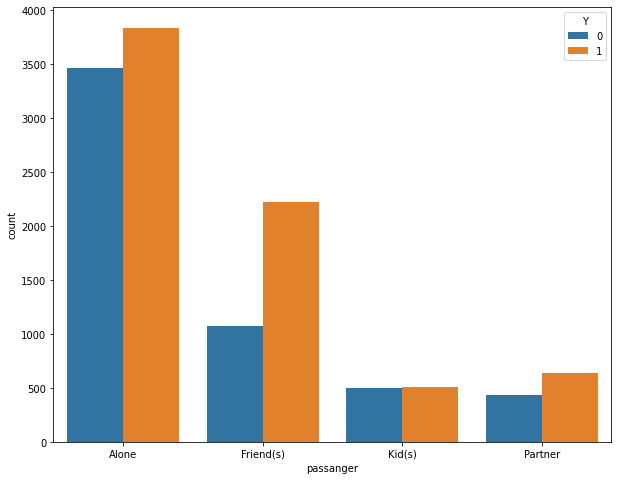

In [ ]:
plt.figure(figsize=(10,8))
sns.countplot(x='passanger', hue='Y', data=df)

[Text(0, 0, 'Architecture & '),
 Text(0, 0, 'Arts Design Ent'),
 Text(0, 0, 'Building & Grou'),
 Text(0, 0, 'Business & Fina'),
 Text(0, 0, 'Community & Soc'),
 Text(0, 0, 'Computer & Math'),
 Text(0, 0, 'Construction & '),
 Text(0, 0, 'Education&Train'),
 Text(0, 0, 'Farming Fishing'),
 Text(0, 0, 'Food Preparatio'),
 Text(0, 0, 'Healthcare Prac'),
 Text(0, 0, 'Healthcare Supp'),
 Text(0, 0, 'Installation Ma'),
 Text(0, 0, 'Legal'),
 Text(0, 0, 'Life Physical S'),
 Text(0, 0, 'Management'),
 Text(0, 0, 'Office & Admini'),
 Text(0, 0, 'Personal Care &'),
 Text(0, 0, 'Production Occu'),
 Text(0, 0, 'Protective Serv'),
 Text(0, 0, 'Retired'),
 Text(0, 0, 'Sales & Related'),
 Text(0, 0, 'Student'),
 Text(0, 0, 'Transportation '),
 Text(0, 0, 'Unemployed')]

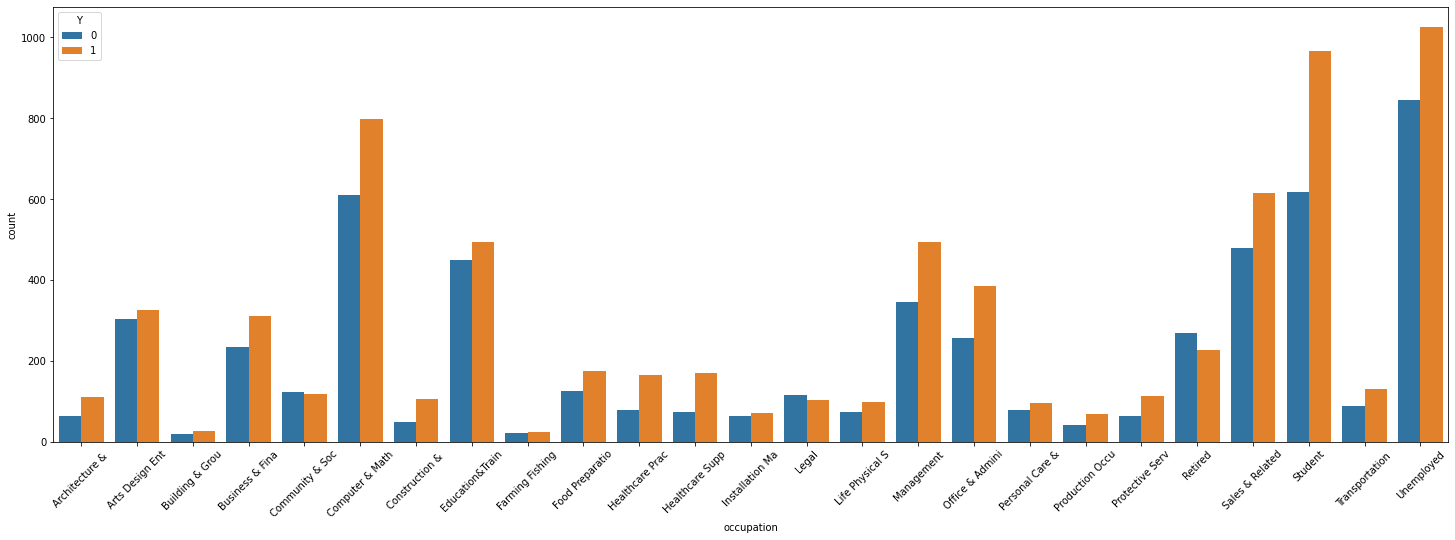

In [ ]:
plt.figure(figsize=(25,8))
ax = sns.countplot(x='occupation', hue='Y', data=df)
xticklabels = ax.get_xticklabels()
for i in range(len(xticklabels)):
  text = xticklabels[i].get_text()[:15]
  xticklabels[i].set_text(text)
  #print(xticklabels[i].get_text())
ax.set_xticklabels(xticklabels,rotation = 45)

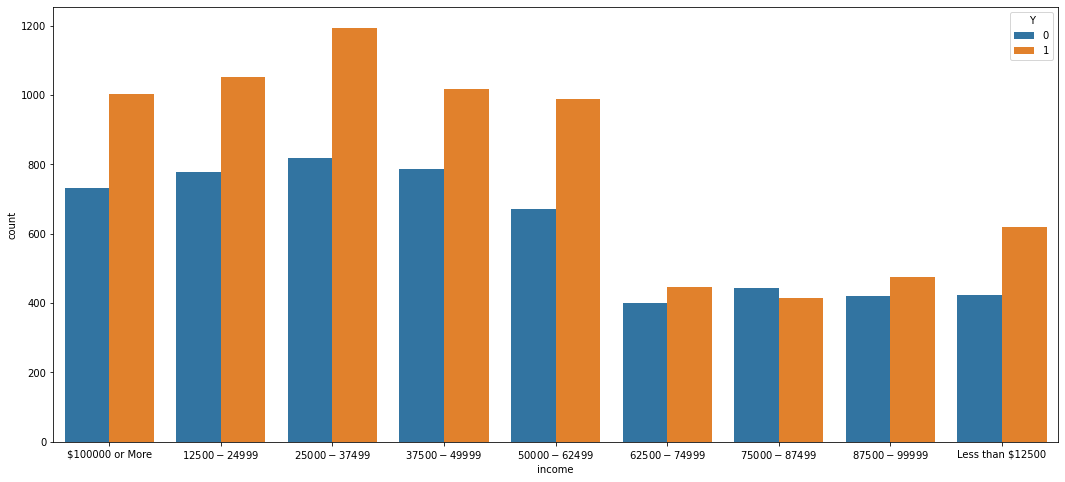

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='income', hue='Y', data=df)

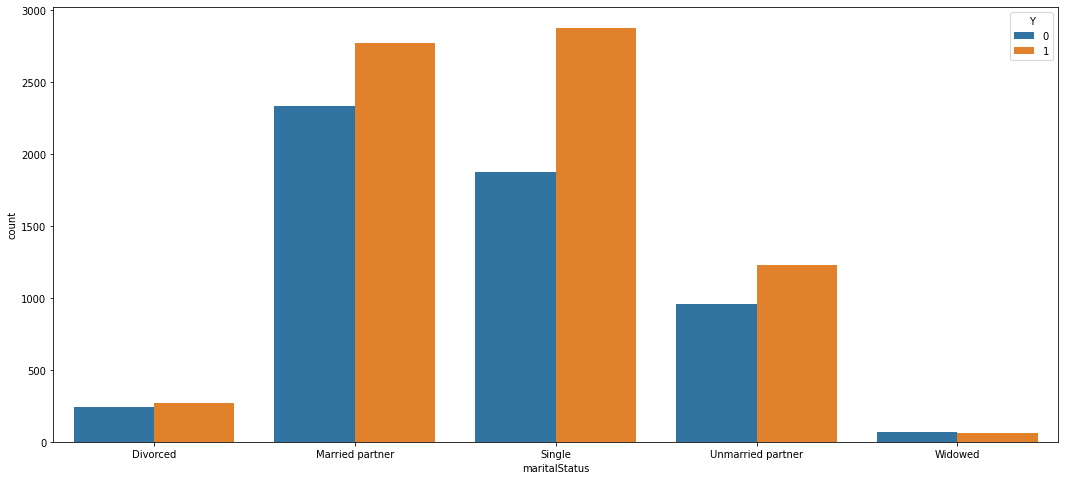

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='maritalStatus', hue='Y', data=df)

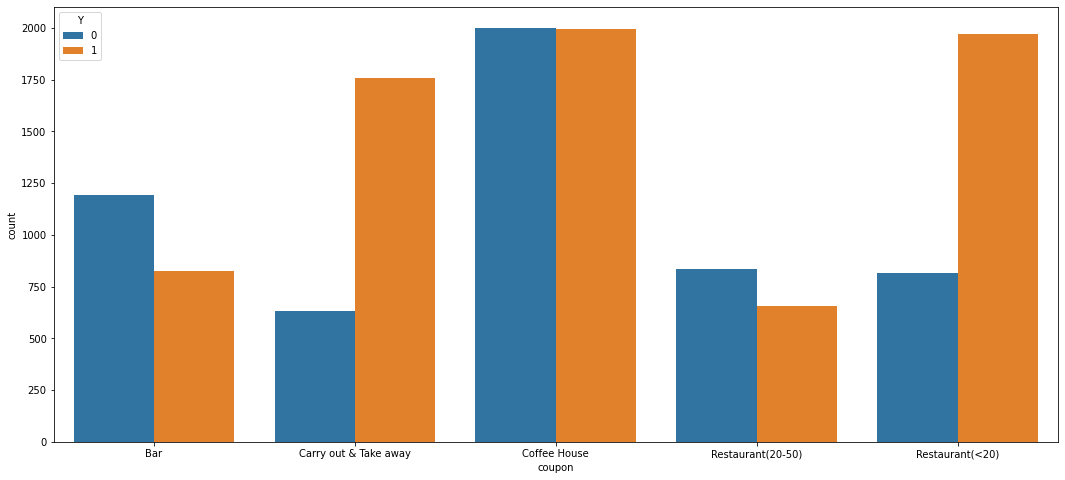

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='coupon', hue='Y', data=df)

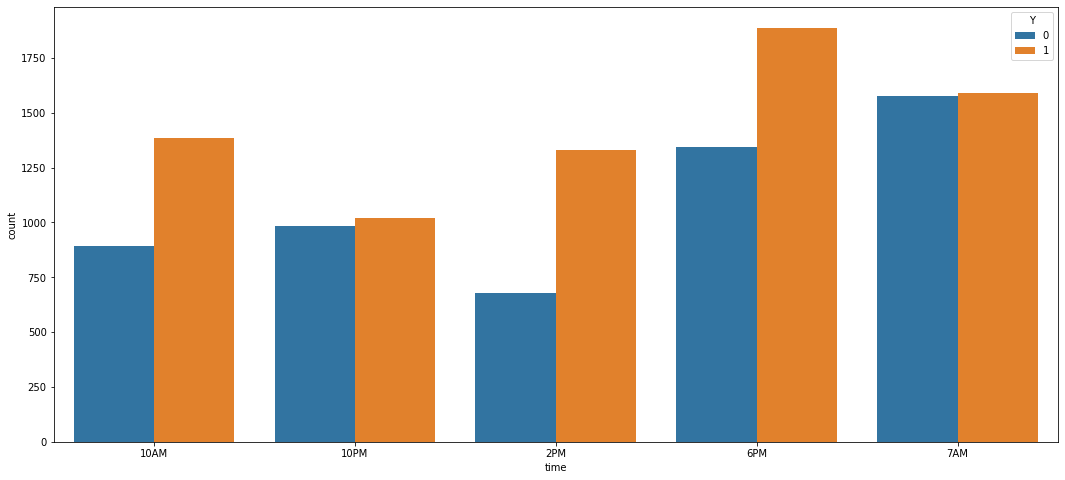

In [ ]:
plt.figure(figsize=(18,8))
sns.countplot(x='time', hue='Y', data=df)

In [ ]:
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from matplotlib.pyplot import figure
from xgboost import XGBClassifier
from yellowbrick.model_selection import learning_curve

In [ ]:
int_cols = ['temperature', 'has_children', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min','direction_same','gender','Y']
for col in df.columns:
  if col not in int_cols:
    df = pd.get_dummies(data=df, columns=[col])
print(df.shape,"\n", df.dtypes)

(12684, 108) 
 temperature               int64
gender                    int64
has_children              int64
toCoupon_GEQ5min          int64
toCoupon_GEQ15min         int64
                          ...  
Restaurant20To50_1~3      uint8
Restaurant20To50_4~8      uint8
Restaurant20To50_gt8      uint8
Restaurant20To50_less1    uint8
Restaurant20To50_never    uint8
Length: 108, dtype: object


In [ ]:
X = df.drop(['Y'], axis = 1)
Y = df['Y']
Y = LabelEncoder().fit_transform(Y)
X = StandardScaler().fit_transform(X)

In [ ]:
def random_forest(d_frame, title):
  X = d_frame.drop(['Y'], axis = 1)
  Y = d_frame['Y']
  Y = LabelEncoder().fit_transform(Y)
  X = StandardScaler().fit_transform(X)

  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                      test_size = 0.2, 
                                                      random_state = 101)
  start = time.process_time()
  model = RandomForestClassifier(n_estimators=1000).fit(X_train, Y_train)
  print("Training time: ", '%.1f'%(time.process_time() - start))
  predictions = model.predict(X_test)
  #display_train_test_curves(model, X, Y)
  display_roc_auc(model, X_test, Y_test, title)
  print(classification_report(Y_test, predictions))
  ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)

In [ ]:
def display_roc_auc(model, X_test, y_test, title):
  lr_probs = model.predict_proba(X_test)[:, 1]
  ns_probs = [_ for _ in range(len(y_test))]
  ns_auc = roc_auc_score(y_test, ns_probs)
  lr_auc = roc_auc_score(y_test, lr_probs)
  print('Guess: ROC AUC=%.3f' % (ns_auc))
  print('Logistic: ROC AUC=%.3f' % (lr_auc))
  ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
  pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Guess')
  pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
  pyplot.title(title)
  pyplot.xlabel('False Positive Rate')
  pyplot.ylabel('True Positive Rate')
  pyplot.legend()
  pyplot.show()

def display_train_test_curves(model, X, Y):
  print(learning_curve(model, X, Y, cv=5, scoring='accuracy'))

###No FE

Training time:  14.1
Guess: ROC AUC=0.496
Logistic: ROC AUC=0.822


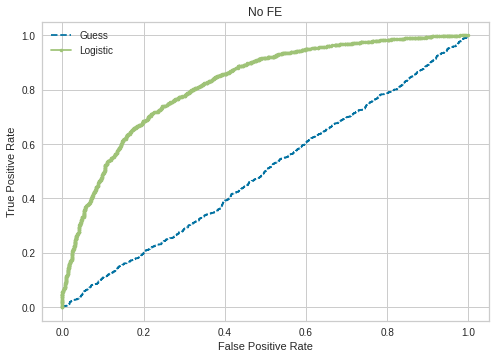

              precision    recall  f1-score   support

           0       0.75      0.64      0.69      1120
           1       0.75      0.83      0.78      1417

    accuracy                           0.75      2537
   macro avg       0.75      0.74      0.74      2537
weighted avg       0.75      0.75      0.74      2537



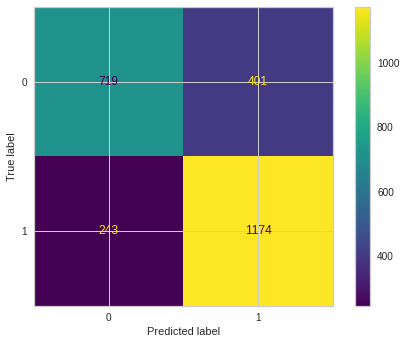

In [ ]:
random_forest(df, 'No FE')

###Optimal number of clusters

####Elbow method

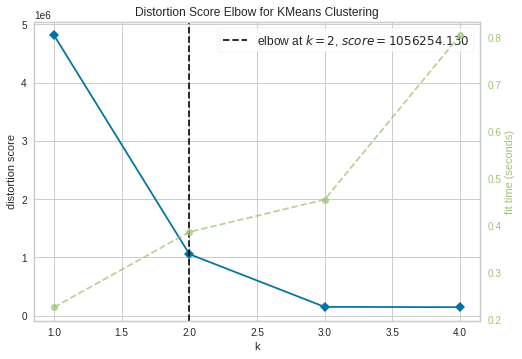

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5), timings= True)
visualizer.fit(X)
visualizer.show()

####Silhouette method

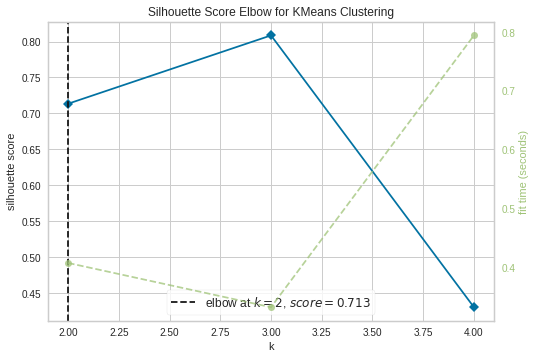

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,5),metric='silhouette', timings= True)
visualizer.fit(X)
visualizer.show()   

#### Hierarchical clustering

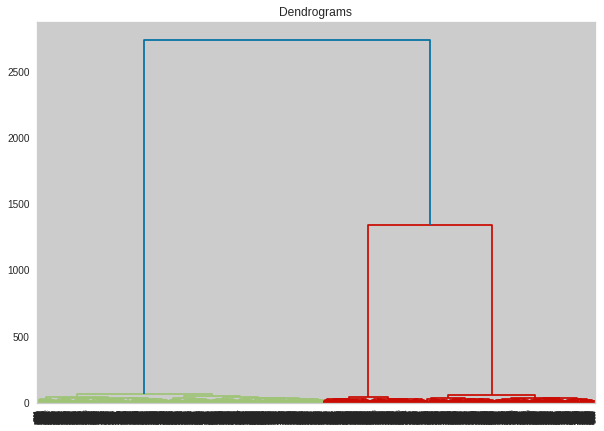

In [ ]:
import scipy.cluster.hierarchy as shc
from matplotlib import pyplot
pyplot.figure(figsize=(10, 7))  
pyplot.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(X, method='ward'))

### PCA

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
PCA_df = pd.DataFrame(data = X_pca, columns = ['PC1', 'PC2'])
PCA_df = pd.concat([PCA_df, df['Y']], axis = 1)
PCA_df['Y'] = LabelEncoder().fit_transform(PCA_df['Y'])
PCA_df.head(10)

,PC1,PC2,Y
0,1.072726,0.388450,0
1,1.634184,1.120983,1
2,-1.697424,-1.426904,0
3,-1.956848,1.525071,1
4,1.867921,-2.626827,0
5,1.265807,0.912626,0
6,3.178563,-0.033375,0
7,-2.449583,3.019041,1
8,-0.003298,1.752513,1
9,2.134306,-0.108077,0


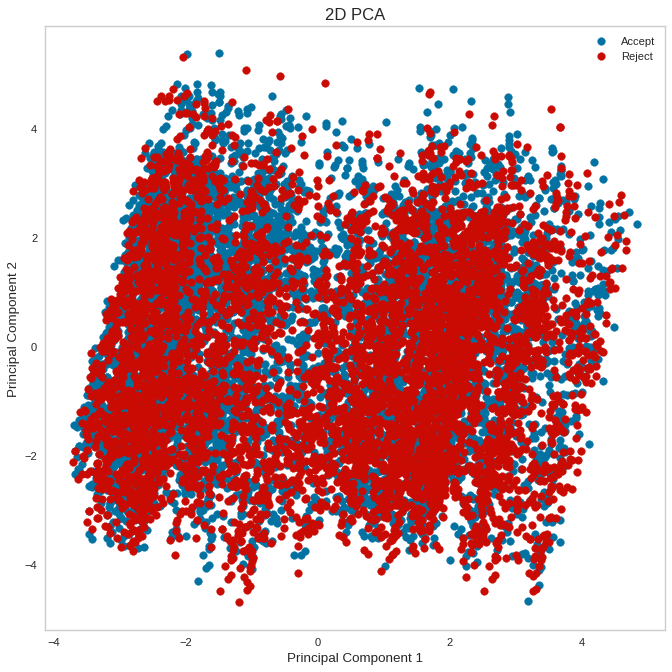

In [ ]:
figure(num=None, figsize=(10, 10), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['b', 'r']
for cl, color in zip(classes, colors):
    plt.scatter(PCA_df.loc[PCA_df['Y'] == cl, 'PC1'], 
                PCA_df.loc[PCA_df['Y'] == cl, 'PC2'], 
                c = color)
    
plt.xlabel('Principal Component 1', fontsize = 12)
plt.ylabel('Principal Component 2', fontsize = 12)
plt.title('2D PCA', fontsize = 15)
plt.legend(['Accept', 'Reject'])
plt.grid()

[0.04236733 0.03319733 0.02735212 0.02699365 0.02349418 0.02289177
 0.02084381 0.02001429 0.01965013 0.01921105 0.01807907 0.01749113
 0.01686829 0.01648154 0.01621028 0.01581163 0.01508546 0.01480686
 0.01458903 0.01446534 0.01414286 0.01380987 0.01366104 0.0135579
 0.01331914 0.0131186  0.01294228 0.01285    0.01250842 0.01239451
 0.0119674  0.01175495 0.01154239 0.01139853 0.01111881 0.01092711
 0.01083427 0.01062597 0.01051671 0.01042841 0.0103392  0.01020394
 0.01000276 0.00987377 0.00976271 0.00970014 0.00955925 0.00952296
 0.0094741  0.0092582  0.00908735 0.00895465 0.00878628 0.00870858
 0.00852267 0.00839967 0.00831089 0.00816995 0.00806871 0.00797397
 0.00778125 0.0077416  0.00749781 0.00729469 0.00712659 0.00695265
 0.00684983 0.00657724 0.00646777 0.006382   0.00627583 0.00604148
 0.00587637 0.00560434 0.00544016 0.00527975 0.00523721 0.00511467
 0.00503607 0.00485907 0.00474633 0.00468114 0.00420967 0.00416085
 0.00353903 0.00323989 0.00315365 0.00291394]


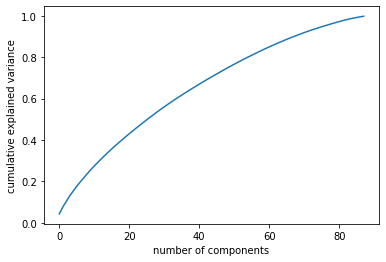

In [ ]:
pca2 = PCA(n_components=88)
pca2.fit_transform(X)
print(pca2.explained_variance_ratio_)
plt.plot(np.cumsum(pca2.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
initial_features_names = list(df.columns)
initial_features_names.remove('Y')
n_pcs = pca2.components_.shape[0]
most_important_names = [np.abs(pca2.components_[i]).argmax() for i in range(n_pcs)]
comp_names = []
init_idxs = []
feat_names = []
expl_var = []
for i in range(n_pcs):
  comp_names.append('PC{}'.format(i))
  init_idxs.append(most_important_names[i])
  feat_names.append(initial_features_names[most_important_names[i]])
  expl_var.append(pca2.explained_variance_ratio_[i])
comps = pd.DataFrame(columns=['Component', 'Initial Index', 'Feature Name', 'Explained Variance'])
comps['Component'] = comp_names
comps['Initial Index'] = init_idxs
comps['Feature Name'] = feat_names
comps['Explained Variance'] = expl_var

In [ ]:
comps.head(10)

,Component,Initial Index,Feature Name,Explained Variance
0,PC0,8,destination_No Urgent Place,0.042367
1,PC1,38,maritalStatus_Married partner,0.033197
2,PC2,86,Bar_never,0.027352
3,PC3,16,weather_Sunny,0.026994
4,PC4,7,destination_Home,0.023494
5,PC5,92,CarryAway_1~3,0.022892
6,PC6,93,CarryAway_4~8,0.020844
7,PC7,47,education_Some college - no degree,0.020014
8,PC8,28,expiration_2h,0.019650
9,PC9,97,RestaurantLessThan20_1~3,0.019211


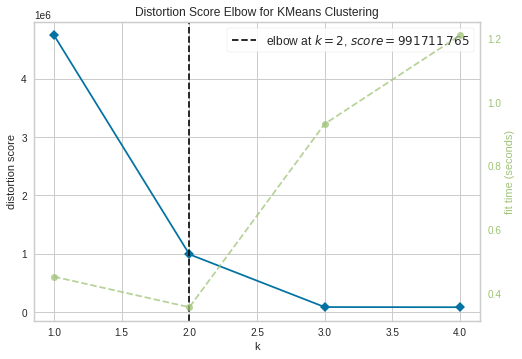

Training time:  13.1
Guess: ROC AUC=0.496
Logistic: ROC AUC=0.785


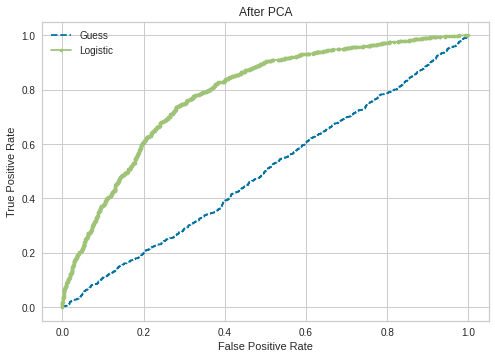

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1120
           1       0.74      0.79      0.77      1417

    accuracy                           0.73      2537
   macro avg       0.73      0.72      0.72      2537
weighted avg       0.73      0.73      0.73      2537



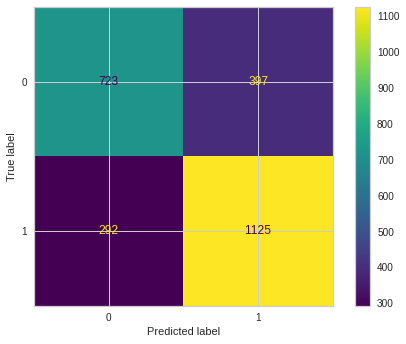

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
feat_names = list(dict.fromkeys(feat_names))
df_pca = df[feat_names].copy()
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,5), timings= True)
visualizer.fit(df_pca)
visualizer.show()
df_pca.insert(0, 'Y', df['Y'])
random_forest(df_pca, 'After PCA')

### TSNE

In [ ]:
from sklearn.manifold import TSNE
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=150, n_iter=500).fit_transform(X)
print('Time elapsed: {} seconds'.format(time.time()-time_start))
TSNE_df = pd.DataFrame(data = tsne, columns = ['N1', 'N2'])
TSNE_df = pd.concat([TSNE_df, df['Y']], axis = 1)
TSNE_df['Y'] = LabelEncoder().fit_transform(TSNE_df['Y'])
TSNE_df.head(10)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 451 nearest neighbors...
[t-SNE] Indexed 12684 samples in 0.002s...
[t-SNE] Computed neighbors for 12684 samples in 6.349s...
[t-SNE] Computed conditional probabilities for sample 1000 / 12684
[t-SNE] Computed conditional probabilities for sample 2000 / 12684
[t-SNE] Computed conditional probabilities for sample 3000 / 12684
[t-SNE] Computed conditional probabilities for sample 4000 / 12684
[t-SNE] Computed conditional probabilities for sample 5000 / 12684
[t-SNE] Computed conditional probabilities for sample 6000 / 12684
[t-SNE] Computed conditional probabilities for sample 7000 / 12684
[t-SNE] Computed conditional probabilities for sample 8000 / 12684
[t-SNE] Computed conditional probabilities for sample 9000 / 12684
[t-SNE] Computed conditional probabilities for sample 10000 / 12684
[t-SNE] Computed conditional probabilities for sample 11000 / 12684
[t-SNE] Computed conditional probabilities for sample 12000 / 12684
[t-SNE] Computed conditional probabilities for sa

,N1,N2,Y
0,-28.258821,5.854624,0
1,-49.579567,-14.227484,1
2,33.083744,-27.571125,0
3,-2.686457,-33.396511,1
4,33.450352,-19.694546,0
5,-14.515100,-41.457230,0
6,-3.702638,-14.605139,0
7,-22.676804,-9.383142,1
8,9.362606,-39.666958,1
9,3.503414,-35.726612,0


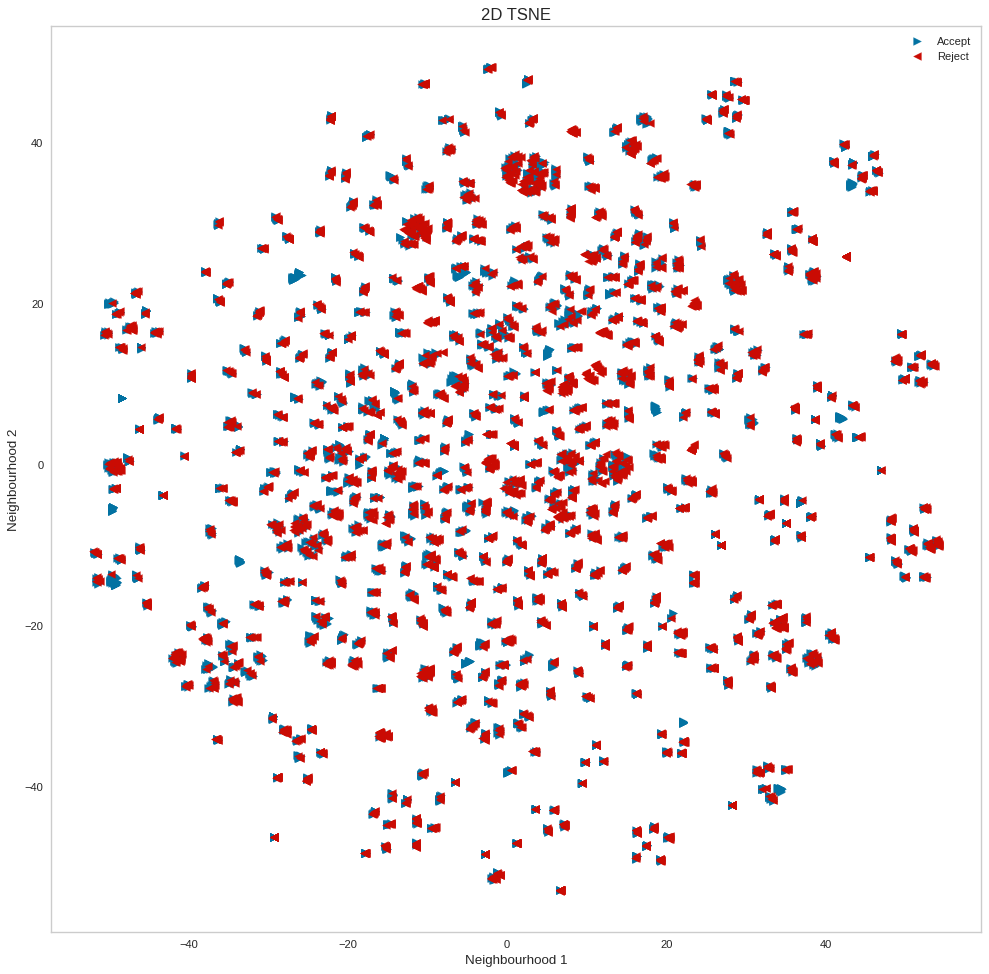

In [ ]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['b', 'r']
markers = ['>', '<']
for cl, color, m in zip(classes, colors, markers):
    plt.scatter(TSNE_df.loc[TSNE_df['Y'] == cl, 'N1'], 
                TSNE_df.loc[TSNE_df['Y'] == cl, 'N2'], 
                marker=m,
                c = color)
    
plt.xlabel('Neighbourhood 1', fontsize = 12)
plt.ylabel('Neighbourhood 2', fontsize = 12)
plt.title('2D TSNE', fontsize = 15)
plt.legend(['Accept', 'Reject'])
plt.grid()

### Isomap

In [ ]:
from sklearn.manifold import Isomap
time_start = time.time()
isomap = Isomap(n_components=2).fit_transform(X)
print('Time elapsed: {} seconds'.format(time.time()-time_start))
Isomap_df = pd.DataFrame(data = isomap, columns = ['N1', 'N2'])
Isomap_df = pd.concat([Isomap_df, df['Y']], axis = 1)
Isomap_df['Y'] = LabelEncoder().fit_transform(Isomap_df['Y'])
Isomap_df.head(10)

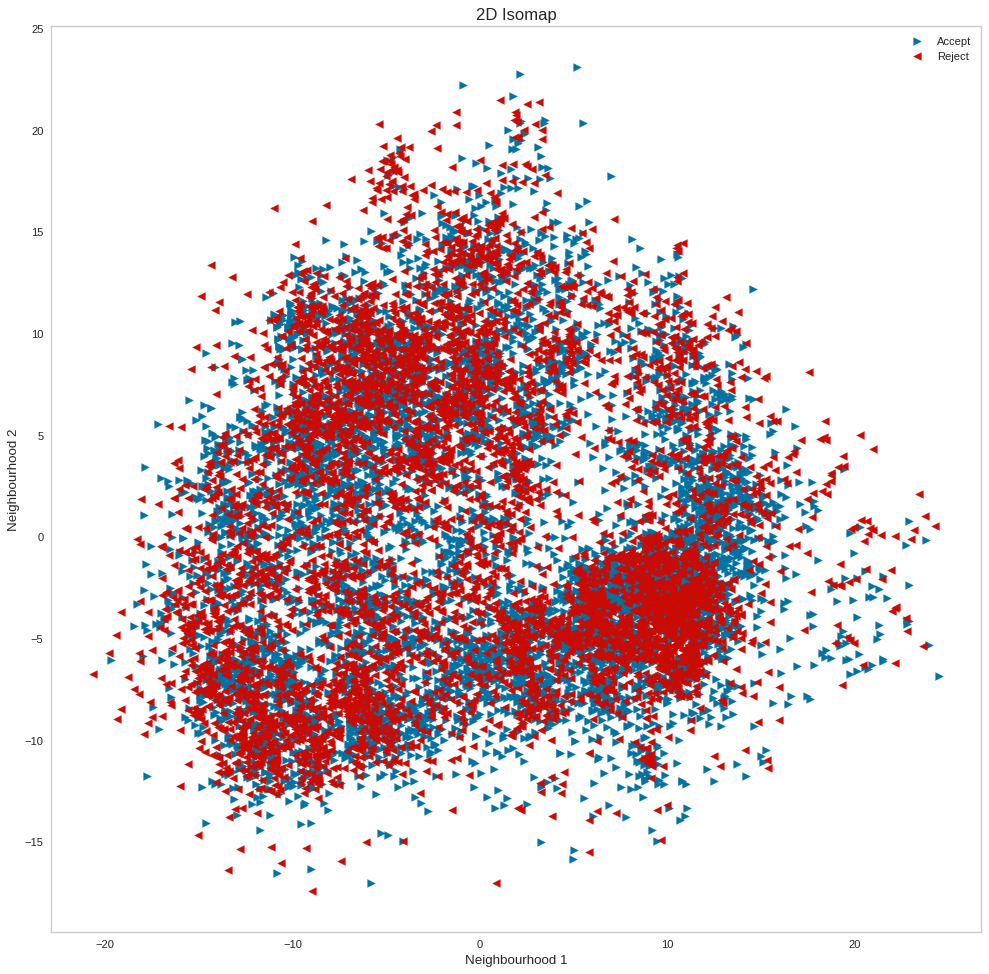

In [ ]:
figure(num=None, figsize=(15, 15), dpi=80, facecolor='w', edgecolor='k')

classes = [1, 0]
colors = ['b', 'r']
markers = ['>', '<']
for cl, color, m in zip(classes, colors, markers):
    plt.scatter(Isomap_df.loc[Isomap_df['Y'] == cl, 'N1'], 
                Isomap_df.loc[Isomap_df['Y'] == cl, 'N2'], 
                marker=m,
                c = color)
    
plt.xlabel('Neighbourhood 1', fontsize = 12)
plt.ylabel('Neighbourhood 2', fontsize = 12)
plt.title('2D Isomap', fontsize = 15)
plt.legend(['Accept', 'Reject'])
plt.grid()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
steps = [('iso', Isomap(n_components=63)), ('m', RandomForestClassifier(n_estimators=1000))]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                      test_size = 0.2, 
                                                      random_state = 101)
model = Pipeline(steps=steps).fit(X_train, Y_train)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_index.py:84: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
/usr/local/lib/python3.7/dist-packages/scipy/sparse/_

Guess: ROC AUC=0.496
Logistic: ROC AUC=0.688


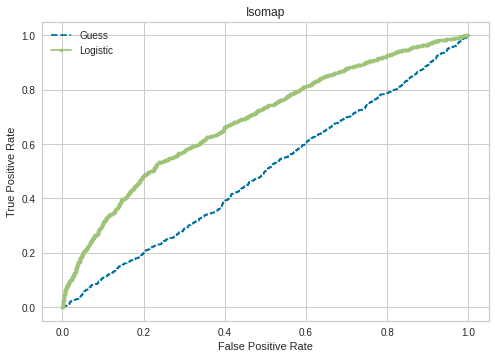

              precision    recall  f1-score   support

           0       0.60      0.46      0.52      1120
           1       0.64      0.76      0.70      1417

    accuracy                           0.63      2537
   macro avg       0.62      0.61      0.61      2537
weighted avg       0.62      0.63      0.62      2537



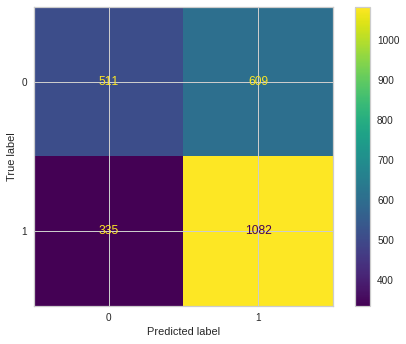

In [ ]:
display_roc_auc(model, X_test, Y_test, "Isomap")
predictions = model.predict(X_test)
print(classification_report(Y_test, predictions))
ConfusionMatrixDisplay.from_estimator(model, X_test, Y_test)